# Website Traffic Forecasting

##  STEP 1 : DATA LOADING & PREPROCESSING

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Load the dataset
# ------------------------------------------------------------
file_path = "daily-website-visitors.csv"

# Read the CSV file
df = pd.read_csv(file_path)

# Display basic info
print("Initial shape:", df.shape)
print("\nColumns:", df.columns.tolist())
display(df.head(7))

# ------------------------------------------------------------
#  Clean and format numeric columns
numeric_cols = ['Page.Loads', 'Unique.Visits', 'First.Time.Visits', 'Returning.Visits']

for col in numeric_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace(',', '').str.strip()
        df[col] = pd.to_numeric(df[col], errors='coerce')

# ------------------------------------------------------------
#  Parse date column and set as datetime index
# ------------------------------------------------------------
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.sort_values('Date').reset_index(drop=True)
df.set_index('Date', inplace=True)

# ------------------------------------------------------------
# Check for missing values and reindex to daily frequency
# ------------------------------------------------------------
full_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')
df = df.reindex(full_range)
df.index.name = 'Date'

# Report missing values
print("\nMissing values per column after reindexing:")
print(df.isna().sum())

# ------------------------------------------------------------
#  Handle missing values (interpolation for numeric columns)
# ------------------------------------------------------------
df[numeric_cols] = df[numeric_cols].interpolate(method='linear')

# ------------------------------------------------------------
#  Verify data types and basic summary
# ------------------------------------------------------------
print("\nData types after cleaning:")
print(df.dtypes)

print("\nSummary statistics for Page.Loads:")
display(df['Page.Loads'].describe())


Initial shape: (2167, 8)

Columns: ['Row', 'Day', 'Day.Of.Week', 'Date', 'Page.Loads', 'Unique.Visits', 'First.Time.Visits', 'Returning.Visits']


,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,"2,146","1,582","1,430",152
1,2,Monday,2,9/15/2014,"3,621","2,528","2,297",231
2,3,Tuesday,3,9/16/2014,"3,698","2,630","2,352",278
3,4,Wednesday,4,9/17/2014,"3,667","2,614","2,327",287
4,5,Thursday,5,9/18/2014,"3,316","2,366","2,130",236
5,6,Friday,6,9/19/2014,"2,815","1,863","1,622",241
6,7,Saturday,7,9/20/2014,"1,658","1,118",985,133



Missing values per column after reindexing:
Row                  0
Day                  0
Day.Of.Week          0
Page.Loads           0
Unique.Visits        0
First.Time.Visits    0
Returning.Visits     0
dtype: int64

Data types after cleaning:
Row                   int64
Day                  object
Day.Of.Week           int64
Page.Loads            int64
Unique.Visits         int64
First.Time.Visits     int64
Returning.Visits      int64
dtype: object

Summary statistics for Page.Loads:


count    2167.000000
mean     4116.989386
std      1350.977843
min      1002.000000
25%      3114.500000
50%      4106.000000
75%      5020.500000
max      7984.000000
Name: Page.Loads, dtype: float64

## STEP 2: Exploratory Data Analysis (EDA)

In [20]:
#  Import necessary libraries
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [11]:
# ------------------------------------------------------------
# 🔧 Data Cleaning: Remove commas and convert to numeric
# ------------------------------------------------------------
cols_to_fix = ['Page.Loads','Unique.Visits','First.Time.Visits','Returning.Visits']

for col in cols_to_fix:
    df[col] = df[col].astype(str).str.replace(',', '')  # remove commas
    df[col] = pd.to_numeric(df[col], errors='coerce')   # convert to float


,Row,Day.Of.Week,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
count,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000
mean,1084.000000,3.997231,4116.989386,2943.646516,2431.824181,511.822335
std,625.703338,2.000229,1350.977843,977.886472,828.704688,168.736370
min,1.000000,1.000000,1002.000000,667.000000,522.000000,133.000000
25%,542.500000,2.000000,3114.500000,2226.000000,1830.000000,388.500000
50%,1084.000000,4.000000,4106.000000,2914.000000,2400.000000,509.000000
75%,1625.500000,6.000000,5020.500000,3667.500000,3038.000000,626.500000
max,2167.000000,7.000000,7984.000000,5541.000000,4616.000000,1036.000000


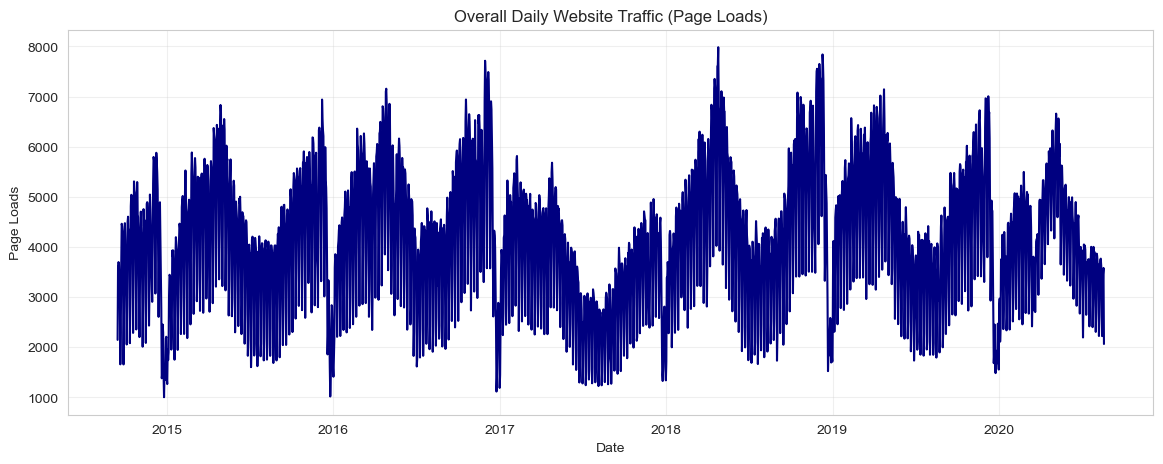

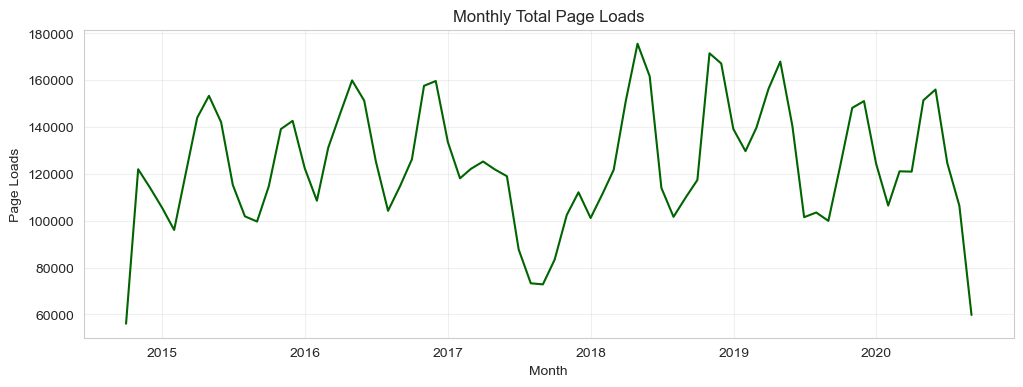

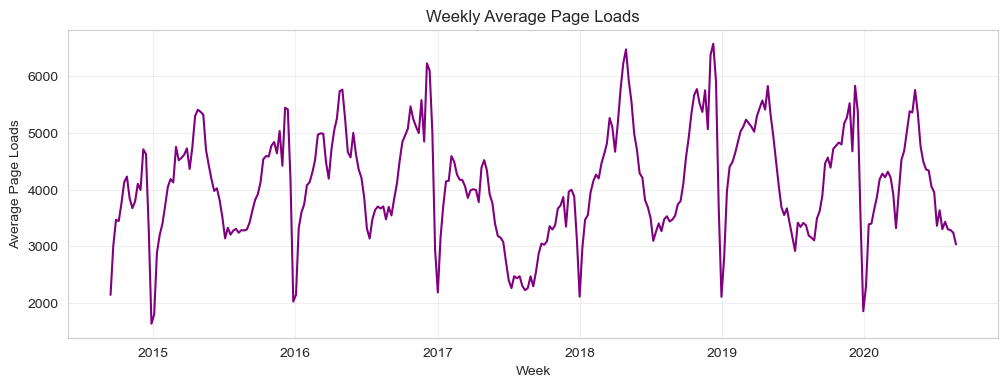

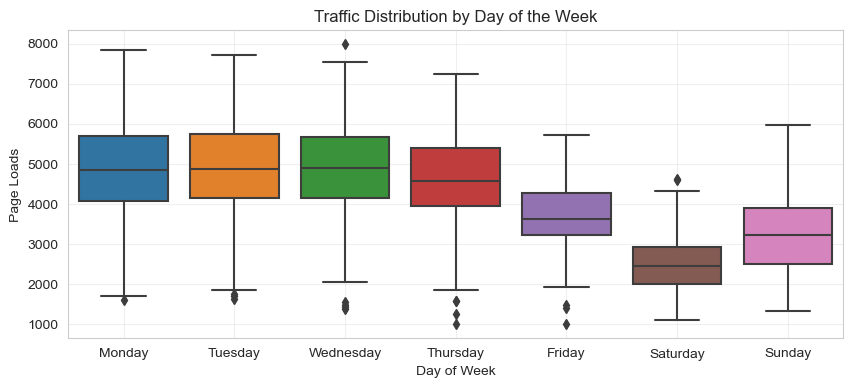

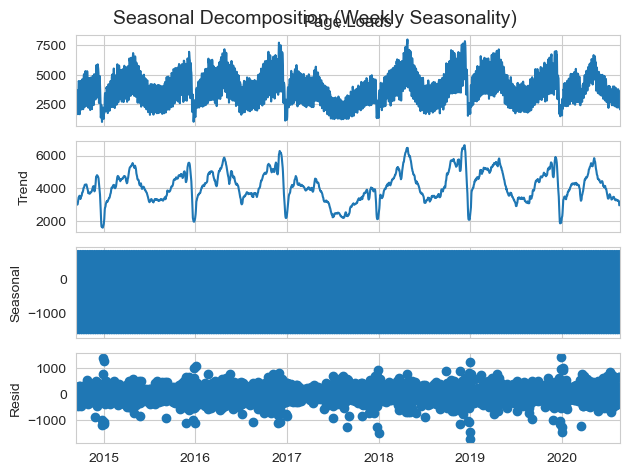

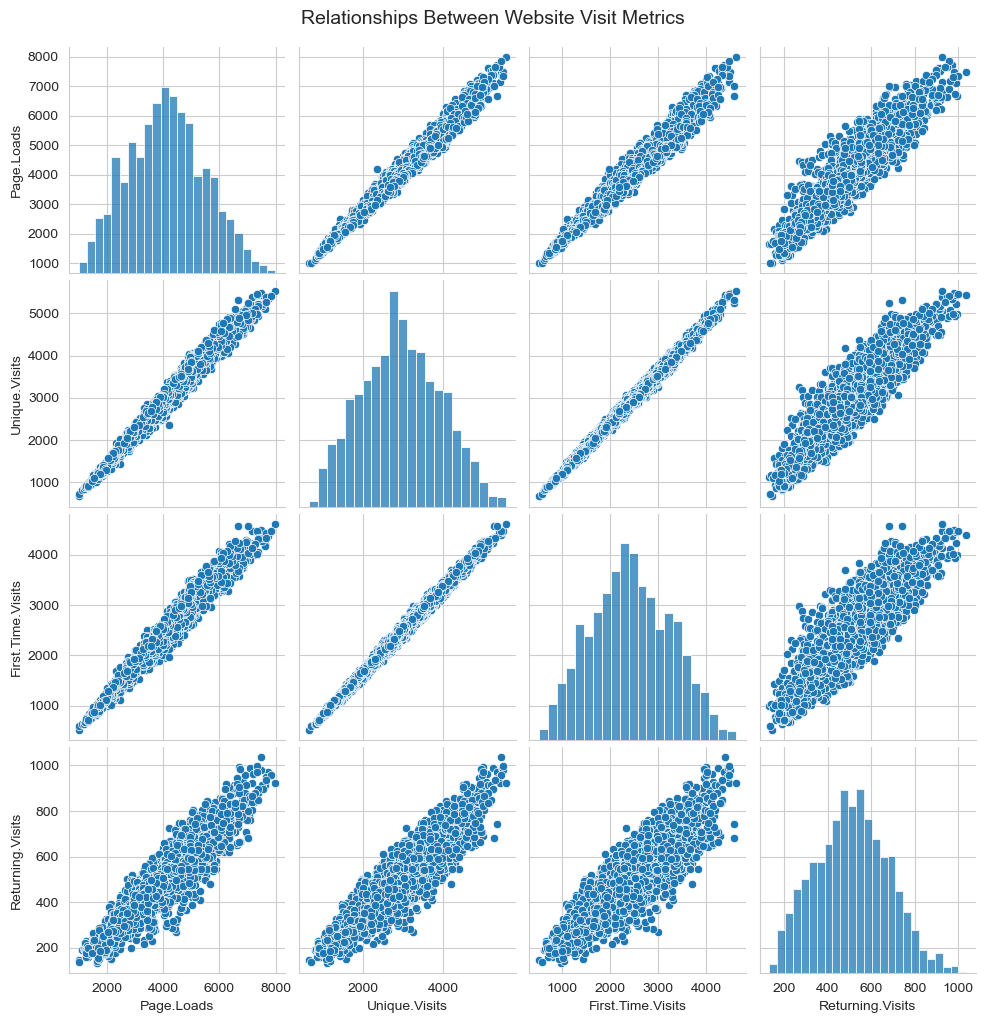

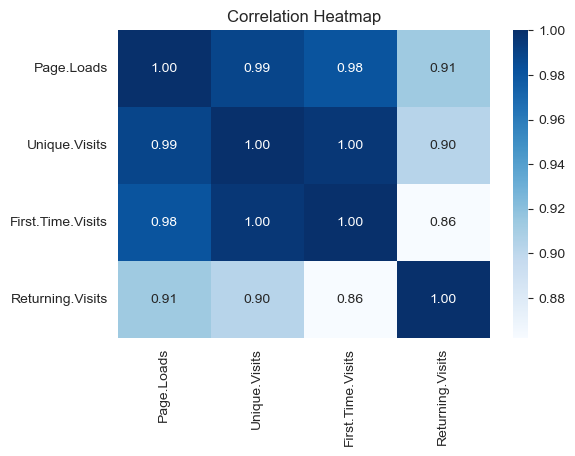

In [21]:
# ------------------------------------------------------------
#  Statistical Summary
# ------------------------------------------------------------
display(df.describe())

# ------------------------------------------------------------
#  Plot overall website traffic trend
# ------------------------------------------------------------
plt.figure(figsize=(14,5))
plt.plot(df['Page.Loads'], color='navy')
plt.title('Overall Daily Website Traffic (Page Loads)')
plt.xlabel('Date')
plt.ylabel('Page Loads')
plt.grid(True, alpha=0.3)
plt.show()

# ------------------------------------------------------------
#  Yearly / Monthly / Weekly Aggregation
# ------------------------------------------------------------
# Monthly trend
monthly = df['Page.Loads'].resample('M').sum()
plt.figure(figsize=(12,4))
plt.plot(monthly, color='darkgreen')
plt.title('Monthly Total Page Loads')
plt.xlabel('Month')
plt.ylabel('Page Loads')
plt.grid(True, alpha=0.3)
plt.show()

# Weekly trend
weekly = df['Page.Loads'].resample('W').mean()
plt.figure(figsize=(12,4))
plt.plot(weekly, color='purple')
plt.title('Weekly Average Page Loads')
plt.xlabel('Week')
plt.ylabel('Average Page Loads')
plt.grid(True, alpha=0.3)
plt.show()

# ------------------------------------------------------------
# Day-of-week analysis
# ------------------------------------------------------------
df['day_of_week'] = df.index.day_name()

plt.figure(figsize=(10,4))
sns.boxplot(x='day_of_week', y='Page.Loads', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Traffic Distribution by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Page Loads')
plt.grid(True, alpha=0.3)
plt.show()

# ------------------------------------------------------------
#  Seasonal Decomposition (Trend + Seasonality + Residuals)
# ------------------------------------------------------------
try:
    decomposition = seasonal_decompose(df['Page.Loads'], model='additive', period=7)
    decomposition.plot()
    plt.suptitle('Seasonal Decomposition (Weekly Seasonality)', fontsize=14)
    plt.show()
except Exception as e:
    print("Decomposition failed:", e)

# ------------------------------------------------------------
# Relationship between different visit types
# ------------------------------------------------------------
sns.pairplot(df[['Page.Loads', 'Unique.Visits', 'First.Time.Visits', 'Returning.Visits']])
plt.suptitle('Relationships Between Website Visit Metrics', y=1.02, fontsize=14)
plt.show()

# ------------------------------------------------------------
#  Correlation Heatmap
# ------------------------------------------------------------
plt.figure(figsize=(6,4))
sns.heatmap(df[['Page.Loads','Unique.Visits','First.Time.Visits','Returning.Visits']].corr(), 
            annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [7]:
# ============================================================
# SAVE CLEANED DATASET FOR DASHBOARD USE
# ============================================================
cleaned_df = df.reset_index()

# Save cleaned dataset to CSV
cleaned_df.to_csv("cleaned_website_traffic.csv", index=False)


In [23]:
import os

# Define folder path
save_path = r"D:\save\1.Website Traffic Forecasting"

os.makedirs(save_path, exist_ok=True)

cleaned_df = df.reset_index()

# Create full file path
file_name = "cleaned_website_traffic.csv"
full_path = os.path.join(save_path, file_name)

# Save cleaned dataset
cleaned_df.to_csv(full_path, index=False)


## STEP 3 :Model Implementations (Baseline + Multiple Approaches)

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')


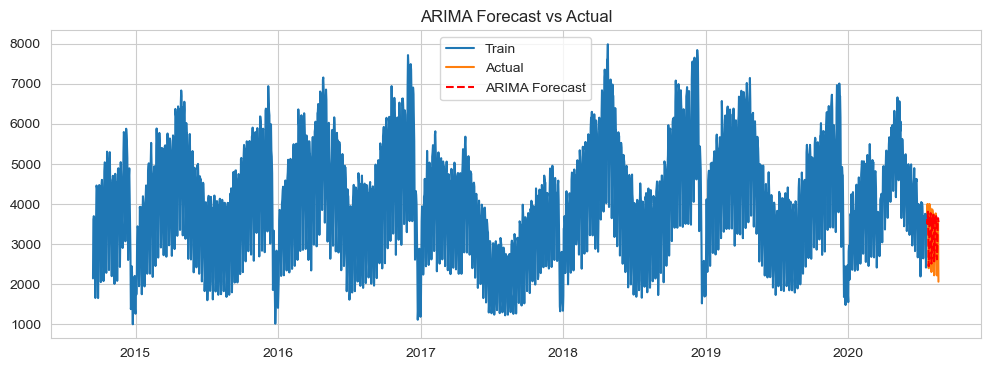

ARIMA RMSE: 353.73


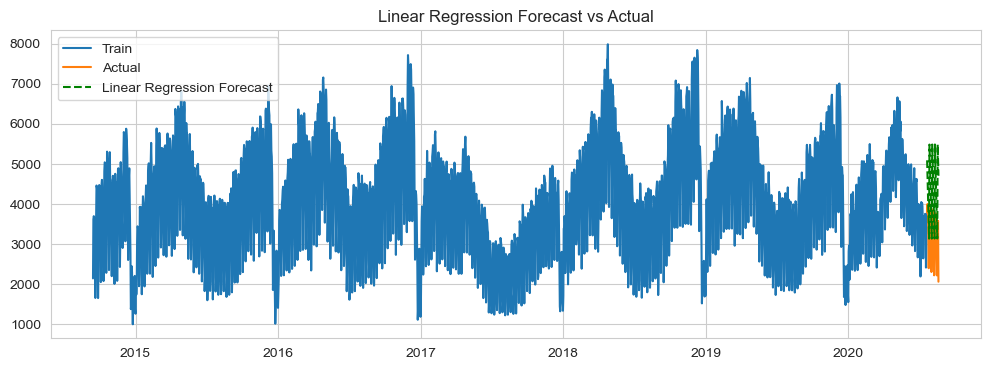

Linear Regression RMSE: 1197.22


In [24]:
#Split data into train and test

horizon = 30  # last 30 days as test
train = df[:-horizon]
test = df[-horizon:]

# ============================================================
#  TIME SERIES MODEL (ARIMA)
# ============================================================
model = ARIMA(train['Page.Loads'], order=(5,1,2))  # simple ARIMA(p,d,q)
fitted = model.fit()

# Forecast for next 30 days
forecast = fitted.forecast(steps=horizon)

# Plot ARIMA forecast
plt.figure(figsize=(12,4))
plt.plot(train.index, train['Page.Loads'], label='Train')
plt.plot(test.index, test['Page.Loads'], label='Actual')
plt.plot(test.index, forecast, '--', label='ARIMA Forecast', color='red')
plt.legend(); plt.title("ARIMA Forecast vs Actual"); plt.show()

# Evaluate ARIMA
rmse = sqrt(mean_squared_error(test['Page.Loads'], forecast))
print(f"ARIMA RMSE: {rmse:.2f}")

# ============================================================
#  MACHINE LEARNING MODEL (Linear Regression)
# ============================================================

df_ml = df.copy()
df_ml['day'] = np.arange(len(df_ml))  # time index
df_ml['day_of_week'] = df_ml.index.dayofweek

# Split again
train_ml = df_ml[:-horizon]
test_ml  = df_ml[-horizon:]

# Prepare X, y
X_train = train_ml[['day', 'day_of_week']]
y_train = train_ml['Page.Loads']
X_test  = test_ml[['day', 'day_of_week']]
y_test  = test_ml['Page.Loads']

# Train linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred = lr.predict(X_test)

# Plot Linear Regression forecast
plt.figure(figsize=(12,4))
plt.plot(train_ml.index, train_ml['Page.Loads'], label='Train')
plt.plot(test_ml.index, test_ml['Page.Loads'], label='Actual')
plt.plot(test_ml.index, y_pred, '--', label='Linear Regression Forecast', color='green')
plt.legend(); plt.title("Linear Regression Forecast vs Actual"); plt.show()

# Evaluate Linear Regression
rmse_lr = sqrt(mean_squared_error(y_test, y_pred))
print(f"Linear Regression RMSE: {rmse_lr:.2f}")


## STEP 4 : HYPERPARAMETER TUNING (ARIMA)

Running grid search for ARIMA hyperparameters...

ARIMA(0,0,0) RMSE = 1048.19
ARIMA(0,0,1) RMSE = 1051.36
ARIMA(0,0,2) RMSE = 1049.73
ARIMA(0,1,0) RMSE = 769.57
ARIMA(0,1,1) RMSE = 1036.10
ARIMA(0,1,2) RMSE = 627.86
ARIMA(1,0,0) RMSE = 1032.12
ARIMA(1,0,1) RMSE = 1049.13
ARIMA(1,0,2) RMSE = 1049.96
ARIMA(1,1,0) RMSE = 1051.06
ARIMA(1,1,1) RMSE = 974.77
ARIMA(1,1,2) RMSE = 680.58
ARIMA(2,0,0) RMSE = 1066.85
ARIMA(2,0,1) RMSE = 1051.82
ARIMA(2,0,2) RMSE = 1050.07
ARIMA(2,1,0) RMSE = 654.38
ARIMA(2,1,1) RMSE = 600.29
ARIMA(2,1,2) RMSE = 510.74
ARIMA(3,0,0) RMSE = 1033.06
ARIMA(3,0,1) RMSE = 1044.95
ARIMA(3,0,2) RMSE = 1040.38
ARIMA(3,1,0) RMSE = 651.03
ARIMA(3,1,1) RMSE = 673.12
ARIMA(3,1,2) RMSE = 502.41

✅ Best ARIMA parameters: (3, 1, 2) with RMSE: 502.41


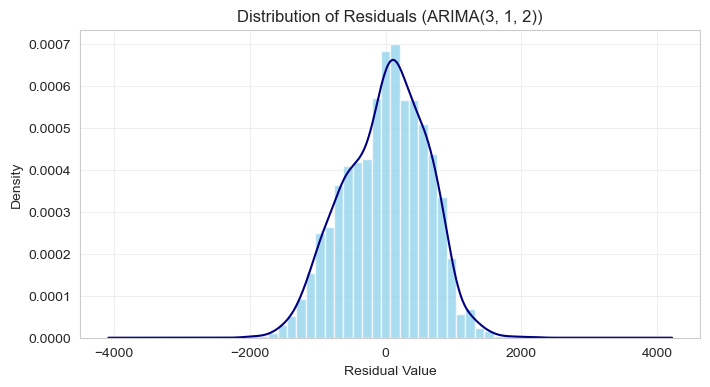

In [25]:

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Define ranges for p, d, q
p_values = [0, 1, 2, 3]
d_values = [0, 1]
q_values = [0, 1, 2]

best_score, best_cfg = float("inf"), None

print("Running grid search for ARIMA hyperparameters...\n")

# Try every combination of p, d, q
for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                model = ARIMA(train['Page.Loads'], order=(p,d,q))
                model_fit = model.fit()
                forecast = model_fit.forecast(steps=horizon)
                rmse = sqrt(mean_squared_error(test['Page.Loads'], forecast))
                print(f"ARIMA({p},{d},{q}) RMSE = {rmse:.2f}")
                if rmse < best_score:
                    best_score, best_cfg = rmse, (p,d,q)
            except:
                continue

print("\n✅ Best ARIMA parameters:", best_cfg, "with RMSE:", round(best_score,2))

# Train final ARIMA with best parameters
best_model = ARIMA(train['Page.Loads'], order=best_cfg)
best_fit = best_model.fit()

# Forecast again
best_forecast = best_fit.forecast(steps=horizon)

# Plot
residuals = best_fit.resid
plt.figure(figsize=(8,4))
plt.hist(residuals, bins=30, density=True, color='skyblue', alpha=0.7)
residuals.plot(kind='kde', color='navy')
plt.title(f'Distribution of Residuals (ARIMA{best_cfg})')
plt.xlabel('Residual Value')
plt.grid(True, alpha=0.3)
plt.show()

## STEP 5 : MODEL EVALUATION & COMPARISON 


📊 MODEL PERFORMANCE COMPARISON


Model,RMSE (↓),MAPE (%) (↓)
Tuned ARIMA,502.410000,13.330000
Linear Regression,1197.220000,34.860000


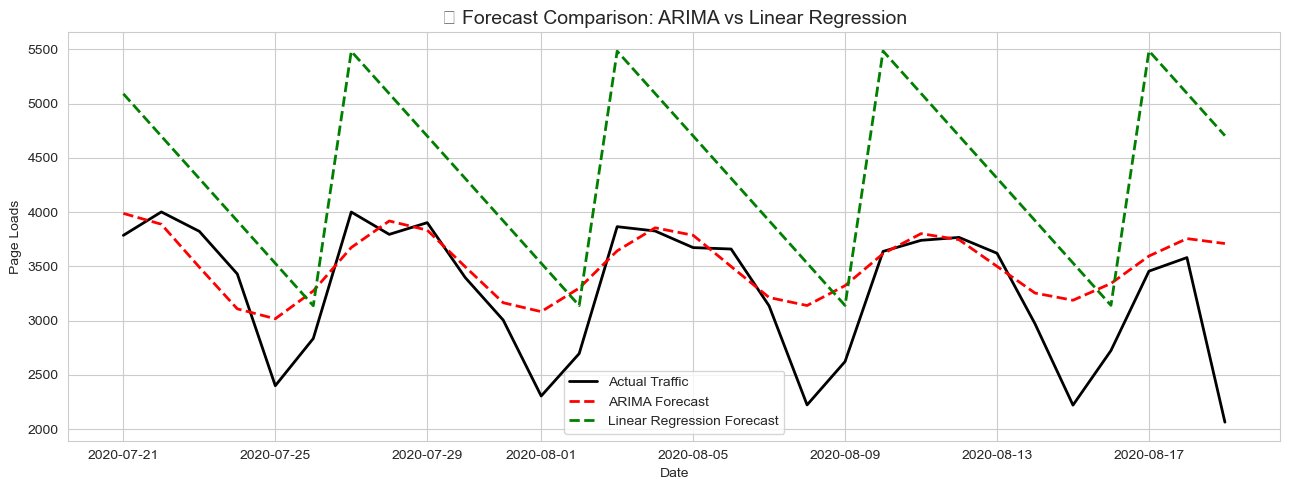

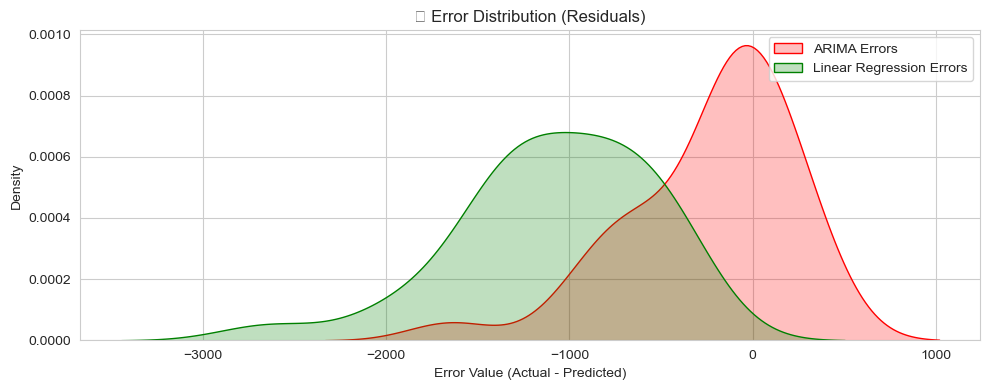

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------------------------------------------
#  Define evaluation metrics
# ------------------------------------------------------------
def rmse(y_true, y_pred):
    return sqrt(mean_squared_error(y_true, y_pred))

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

# ------------------------------------------------------------
#  Evaluate each model
# ------------------------------------------------------------
arima_rmse = rmse(test['Page.Loads'], best_forecast)
arima_mape = mape(test['Page.Loads'], best_forecast)

lr_rmse = rmse(test['Page.Loads'], y_pred)
lr_mape = mape(test['Page.Loads'], y_pred)

# Combine results
results = pd.DataFrame({
    'Model': ['Tuned ARIMA', 'Linear Regression'],
    'RMSE (↓)': [arima_rmse, lr_rmse],
    'MAPE (%) (↓)': [arima_mape, lr_mape]
}).round(2)

# ------------------------------------------------------------
#  Display in styled table
# ------------------------------------------------------------
print("\n📊 MODEL PERFORMANCE COMPARISON")
display(results.style.background_gradient(cmap='Blues', subset=['RMSE (↓)', 'MAPE (%) (↓)'])
                .set_table_styles([{'selector': 'th', 'props': [('font-size', '13px')]}])
                .hide(axis="index"))

# ------------------------------------------------------------
#  Plot 1: Forecast Comparison (Distinct Visualization)
# ------------------------------------------------------------
plt.figure(figsize=(13,5))
sns.set_style("whitegrid")
plt.plot(test.index, test['Page.Loads'], color='black', linewidth=2, label='Actual Traffic')
plt.plot(test.index, best_forecast, '--', color='red', linewidth=2, label='ARIMA Forecast')
plt.plot(test.index, y_pred, '--', color='green', linewidth=2, label='Linear Regression Forecast')
plt.title("🔮 Forecast Comparison: ARIMA vs Linear Regression", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Page Loads")
plt.legend()
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
#  Plot 2: Error Distribution (New Visual)
# ------------------------------------------------------------
plt.figure(figsize=(10,4))
sns.kdeplot(test['Page.Loads'] - best_forecast, fill=True, label='ARIMA Errors', color='red')
sns.kdeplot(test['Page.Loads'] - y_pred, fill=True, label='Linear Regression Errors', color='green')
plt.title("📉 Error Distribution (Residuals)")
plt.xlabel("Error Value (Actual - Predicted)")
plt.legend()
plt.tight_layout()
plt.show()


## STEP 6 :FINAL FORECAST GENERATION & SAVING RESULTS

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

#  forecast horizon 
future_days = 7

# Train final model on full dataset using best ARIMA parameters
final_model = ARIMA(df['Page.Loads'], order=best_cfg)
final_fit = final_model.fit()

# Generate forecast for future days
future_forecast = final_fit.forecast(steps=future_days)

# Create future date range
last_date = df.index[-1]
future_dates = [last_date + timedelta(days=i) for i in range(1, future_days + 1)]

# Create forecast DataFrame
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Forecasted_Page_Loads': future_forecast
})

# Display the forecast
print("\n📅 FUTURE TRAFFIC FORECAST (Next 7 Days)")
display(forecast_df.style.background_gradient(cmap='Purples'))
# ============================================================
# Save forecast results
# ============================================================
output_filename = "final_forecast_results.csv"
forecast_df.to_csv(output_filename, index=False)

print(f"✅ Forecast saved successfully ")


📅 FUTURE TRAFFIC FORECAST (Next 7 Days)


,Date,Forecasted_Page_Loads
2020-08-20 00:00:00,2020-08-20 00:00:00,2159.693715
2020-08-21 00:00:00,2020-08-21 00:00:00,2247.190334
2020-08-22 00:00:00,2020-08-22 00:00:00,2386.057537
2020-08-23 00:00:00,2020-08-23 00:00:00,2462.023868
2020-08-24 00:00:00,2020-08-24 00:00:00,2423.590152
2020-08-25 00:00:00,2020-08-25 00:00:00,2304.435104
2020-08-26 00:00:00,2020-08-26 00:00:00,2195.599945


✅ Forecast saved successfully 
